# Derivación numérica: diferencias finitas

### NOTA
Este notebook se iniciará en la clase; la resolución completa debe ser enviada como "Tarea3.ipynb", desde su carpeta de tareas. Se puede hacer en equipo, con un máximo de dos personas. Si se hace en equipo, incluyan ambos nombres de manera clara.

En este notebook, implementarán funciones que calculan la derivada numéricamente, de una función $f(x)$ en un punto $x_0$ dado.

## Derivada *derecha*

Definan una función `derivada_derecha` que calcule *numéricamente* la derivada de una función $f(x)$ en una variable (a priori arbitaria) que se debe introducir como argumento, en un punto $x_0$ arbitrario, pero que por default lo hace en  $x_0=0.0$. 

Para esto, utilicen la definición de la derivada:

\begin{equation}
f'(x_0) = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0)}{h},
\end{equation}

que requiere la especificación de `h`. (Este método se conoce por el nombre de *diferencias finitas*.)

A fin de simular el $\lim_{h\to 0}$, consideren distintos valores de $h$ que precisamente simulen dicho límite. Para cada valor de $h$ calculen el error absoluto del cálculo numérico (respecto al valor *exacto*, que deberán conocer analíticamente). (Para ser concretos, obtengan la derivada de la función de prueba $f(x) = 3x^3-2$, en $x_0=1$.) Dibujen, como función de $h$, el error de su cálculo (usar escala logarítmica en ambos ejes puede ser una buena idea). A partir de eso, ¿qué conclusión podemos sacar sobre *la convergencia* del cálculo numérico de la derivada? 


In [6]:
function derivada_derecha(f::Function,x0::Float64,h::Float64)
    df = (f(x + h) - f(x)) / h
    return df
end

derivada_derecha (generic function with 1 method)

In [36]:
dfp = derivada_derecha(x -> 3*x^3 - 2, 1.0,0.0001) #utilizando la función de prueba

9.000900029993986

In [37]:
error_fp = abs(dfp - 9) # con h = 0.0001

0.0009000299939856404

In [38]:
df1 = derivada_derecha(x -> 2*x^4,2.0,0.000000001) #otra derivada

64.00000529538374

In [39]:
error_f1 = abs(df1 - 64) # con h = 0.0001

5.295383743941784e-6

Ahora veamos cuando h se vuelve muy, muy pequeño. El error crece, hasta que eventualmente ¡puaf!, el error es tanto como el valor original de la derivada (con h = 1.0 x 10 ^ -16).

In [57]:
f1(x) =  2*x^4
df1 = derivada_derecha(f1,2.0,0.00000000000001)
error_f1 = abs(df1 - 64) 

1.369931689929217

In [56]:
df1 = derivada_derecha(f1,2.0,0.0000000000000001)
error_f1 = abs(df1 - 64) 

64.0

Ahora grafiquemos esto en función de h, con h disminuyendo.

In [72]:
errores = zeros(20)
hs = zeros(20)

for i = 1: 20 #llenemos vector con hs
    hs[i] = 1 / (10^i)
end

for i = 1:20 #llenemos vector con errores
    errores[i] = abs(derivada_derecha(f1, 2.0,hs[i]) - 64.0)
end

hs, errores

([0.1,0.01,0.001,0.0001,1.0e-5,1.0e-6,1.0e-7,1.0e-8,1.0e-9,1.0e-10,1.0e-11,1.0e-12,1.0e-13,1.0e-14,1.0e-15,1.0e-16,1.0e-17,1.0e-18,-1.18389e-19,1.28762e-19],[4.962,0.481602,0.048016,0.00480016,0.000480002,4.80061e-5,4.72695e-6,3.21585e-7,5.29538e-6,5.29538e-6,5.29538e-6,0.00568964,0.0511538,1.36993,7.15658,64.0,64.0,64.0,64.0,64.0])

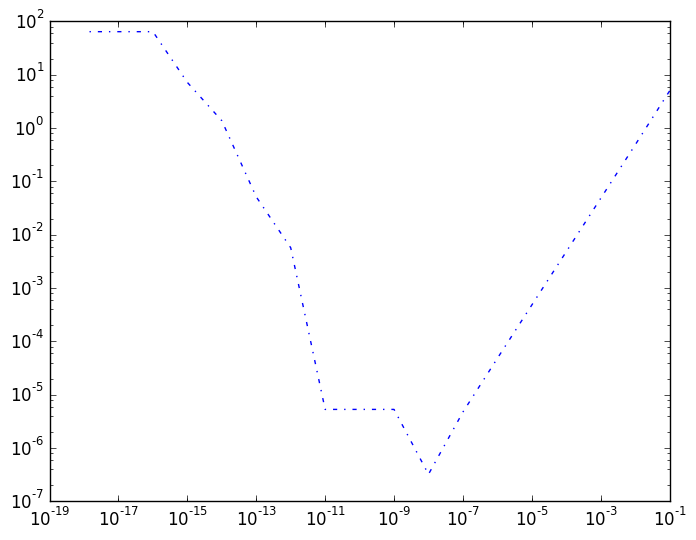

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb01d3117d0>

In [73]:
using PyPlot
loglog(hs,errores, "-.")

## Derivada simétrica

Repitan el ejercicio anterior usando cómo definición de la derivada la versión *simétrica* de la definición de la derivada, es decir:

\begin{equation}
f'(x_0) = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0-h)}{2h}.
\end{equation}



## Derivada *compleja*

Repitan el ejercicio anterior considerando ahora que el incremento de la variable independiente es infinitesimal e *imaginario*. Así, tenemos la definición:

\begin{equation}
f'(x_0) = \lim_{h\to 0} \Im\Big(\frac{f(x_0+ i h)}{h}\Big).
\end{equation}


## Preguntas

- ¿Cuál de las definiciones anteriores es mejor en términos de dar el valor *más exacto* de la derivada? Den un argumento sólido de su conclusión en términos del tipo de convergencia hacia el valor exacto.

- ¿Qué comportamiento de las derivadas en términos de $h$ nos incomoda (en lo más profundo de las entrañas)? ¿A qué se debe esto?